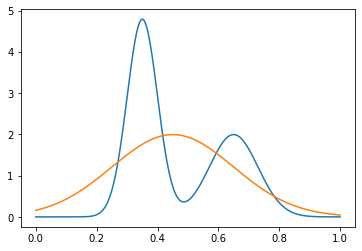

In [1]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# The multiplication constant to make our probability estimation fit
M = 3
# Number of samples to draw from the probability estimation function
N = 1000

# The target probability density function
f = lambda x: 0.6 * norm.pdf(x, 0.35, 0.05) + 0.4 * norm.pdf(x, 0.65, 0.08)
# The approximated probability density function
g = lambda x: norm.pdf(x, 0.45, 0.2)

# plot f(x)
# The x coordinates
x = np.linspace(0, 1, 500)
plt.plot(x,f(x),x,g(x))
plt.savefig('bimodGauss.eps')
x = np.linspace(0, 1, 500)

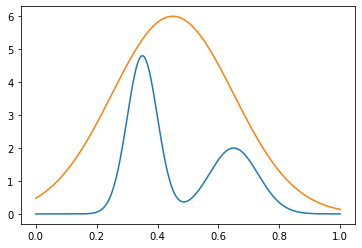

In [2]:
plt.plot(x,f(x),x,M*g(x))
plt.savefig('bimodGauss2.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


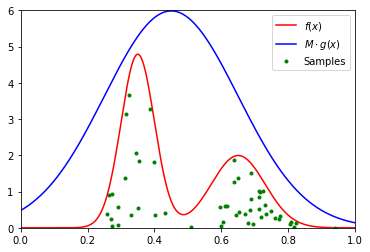

In [4]:
# The approximated probability density function
g = lambda x: norm.pdf(x, 0.45, 0.2)

# A number of samples, drawn from the approximated probability density function
x_samples = M * np.random.normal(0.45, 0.2, (N,))

# A number of samples in the interval [0, 1]
u = np.random.uniform(0, 1, (N, ))

# Now examine all the samples and only use the samples found by rejection sampling
samples = [(x_samples[i], u[i] * M * g(x_samples[i])) for i in range(N) if u[i] < f(x_samples[i]) / (M * g(x_samples[i]))]

# Make the plots
fig, ax = plt.subplots(1, 1)

# The x coordinates
x = np.linspace(0, 1, 500)

# The target probability function
ax.plot(x, f(x), 'r-', label='$f(x)$')

# The approximated probability density function
ax.plot(x, M * g(x), 'b-', label='$M \cdot g(x)$')

# The samples found by rejection sampling
ax.plot([sample[0] for sample in samples], [sample[1] for sample in samples], 'g.', label='Samples')

# Set the window size
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, 6])

# Show the legend
plt.legend()

# Set the title
#plt.title('Rejection sampling')

# Show the plots
#plt.show()
plt.savefig('bimodGauss3.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


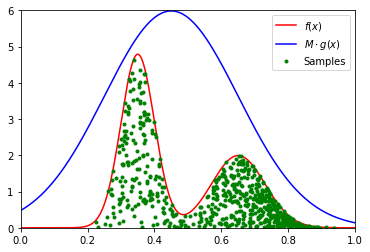

In [5]:
N = 10000
x_samples = M * np.random.normal(0.45, 0.2, (N,))
u = np.random.uniform(0, 1, (N, ))
samples = [(x_samples[i], u[i] * M * g(x_samples[i])) for i in range(N) if u[i] < f(x_samples[i]) / (M * g(x_samples[i]))]
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 500)
ax.plot(x, f(x), 'r-', label='$f(x)$')
ax.plot(x, M * g(x), 'b-', label='$M \cdot g(x)$')
ax.plot([sample[0] for sample in samples], [sample[1] for sample in samples], 'g.', label='Samples')
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, 6])
plt.legend()
#plt.title('Rejection sampling')
#plt.show()
plt.savefig('bimodGauss4.eps')